In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulate data for 100,000 clients
np.random.seed(42)
n_clients= 100000
plataforma = np.random.choice(['Consola', 'PC'], size=n_clients, p=[0.53, 0.47])
amigos = np.random.choice(['Sí', 'No'], size=n_clients, p=[0.74, 0.26])
cp = np.random.choice(['Alta', 'Baja'], size=n_clients, p=[0.60, 0.40]) # Criticas positivas
compra = np.zeros(n_clients)

In [ ]:
for i in range(n_clients):
    if plataforma[i] == 'Consola' and amigos[i] == 'Sí' and cp[i]=='Alta':
        compra[i] = np.random.choice([1, 0], p=[0.95, 0.05])
    elif plataforma[i] == 'Consola' and amigos[i] == 'No' and cp[i]=='Alta':
        compra[i] =  np.random.choice([1, 0], p=[0.98, 0.02])
    elif plataforma[i] == 'Consola' and amigos[i] == 'Sí' and cp[i]=='Baja':
        compra[i] =  np.random.choice([1, 0], p=[0.63, 0.37])
    elif plataforma[i] == 'Consola' and amigos[i] == 'No' and cp[i]=='Baja':
        compra[i] =  np.random.choice([1, 0], p=[0.20, 0.80])
    elif plataforma[i] == 'PC' and amigos[i] == 'Sí' and cp[i]=='Alta':
        compra[i] =  np.random.choice([1, 0], p=[0.93, 0.07])
    elif plataforma[i] == 'PC' and amigos[i] == 'No' and cp[i]=='Alta':
        compra[i] =  np.random.choice([1, 0], p=[0.73, 0.27])
    elif plataforma[i] == 'PC' and amigos[i] == 'Sí' and cp[i]=='Baja':
        compra[i] =  np.random.choice([1, 0], p=[0.53, 0.47])
    elif plataforma[i] == 'PC' and amigos[i] == 'No' and cp[i]=='Baja':
        compra[i] =  np.random.choice([1, 0], p=[0.12, 0.88])
    else:
        compra[i] =  np.random.choice([1, 0], p=[0.001, 0.999])

In [9]:
# Create a DataFrame
data = pd.DataFrame({'Plataforma': plataforma, 'Amigos': amigos, 'Criticas positivas': cp, 'Compra':compra})

In [10]:
# Calculate conditional probabilities
prob_compra = data.groupby(['Plataforma', 'Amigos', 'Criticas positivas'])['Compra'].mean().reset_index()

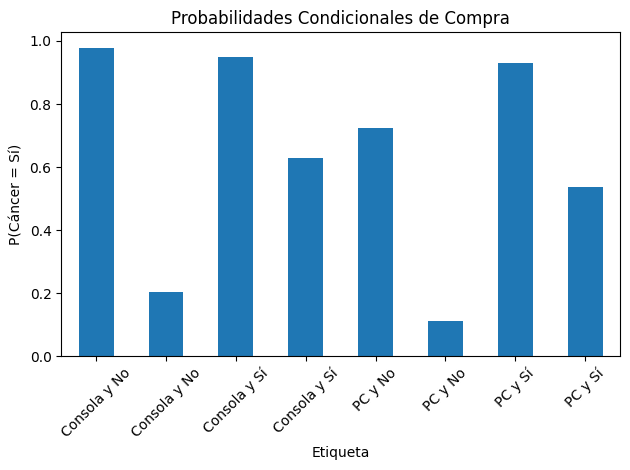

In [11]:
prob_compra['Etiqueta'] = prob_compra['Plataforma'] + ' y ' + prob_compra['Amigos']

# Plot the probabilities
fig, ax = plt.subplots()
prob_compra.plot(kind='bar', x='Etiqueta', y='Compra', ax=ax, legend=False)
ax.set_ylabel('P(Cáncer = Sí)')
ax.set_title('Probabilidades Condicionales de Compra')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('probabilidades_condicionales_compra.png') 
plt.show()